In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
diamond = train.copy()
diamond.head()


,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [6]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [7]:
diamond.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
diamond = diamond.drop('Id', axis=1)

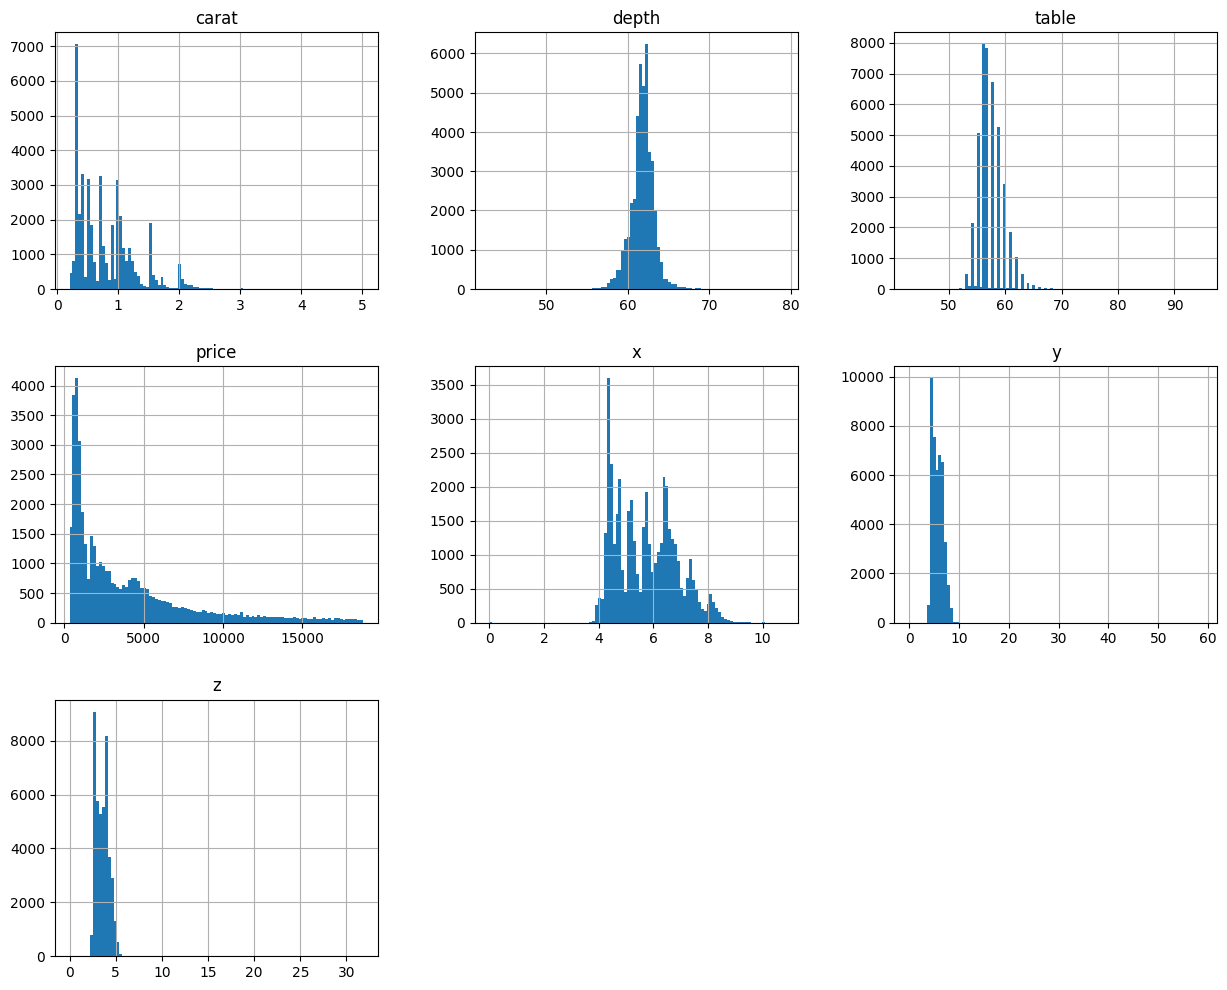

In [9]:
diamond.hist(bins=100, figsize=(15, 12))
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(diamond, test_size=0.2, random_state=42)

In [6]:
corr_matrix_without_strings = diamond.drop(['color', 'cut', 'clarity'], axis=1).corr()
corr_matrix_without_strings["price"].sort_values(ascending=False) 

price    1.000000
carat    0.921911
x        0.885181
y        0.861354
z        0.857665
table    0.128501
Id      -0.001111
depth   -0.013137
Name: price, dtype: float64

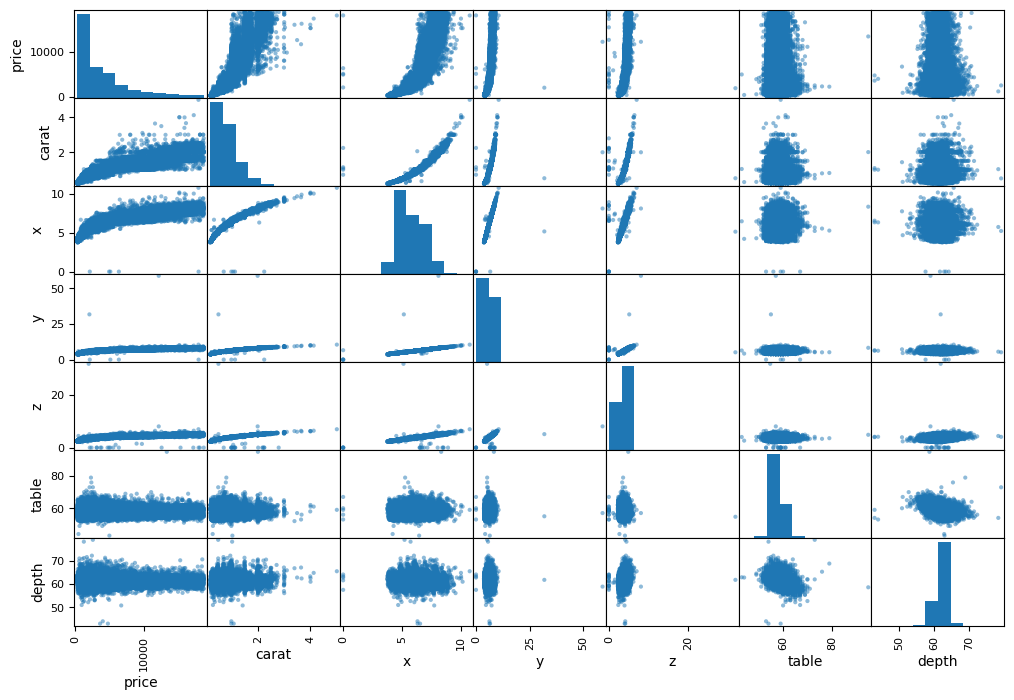

In [7]:
from pandas.plotting import scatter_matrix
attributes = ["price", "carat", "x", "y", 'z', "table", "depth"]
scatter_matrix(diamond[attributes], figsize=(12, 8)) # == pairplot
plt.show()

non linear relation with table and depth

In [10]:

diamond_clarity

,clarity
0,SI2
1,VVS2
2,VS2
3,VS2
4,VVS2
...,...
43147,VS2
43148,VS2
43149,VVS1
43150,VS1


In [15]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
diamond_1 = train_set.copy()

In [13]:
diamond.drop("clarity", axis=1)


In [59]:
diamond_1.drop(['color', 'cut'], axis=1).corr()["price"]

Id        -0.004898
carat      0.921341
clarity   -0.069765
depth     -0.010972
table      0.126465
price      1.000000
x          0.884537
y          0.879284
z          0.852939
Name: price, dtype: float64

In [17]:
diamond_cut = diamond_1[["cut"]]
diamond_color = diamond_1[["color"]]
diamond_clarity = diamond_1[["clarity"]]
diamond_clarity

,clarity
21805,VS1
22939,I1
33888,VS2
35779,IF
20589,SI1
...,...
6265,SI1
11284,VS2
38158,SI1
860,SI1


In [18]:


color_encoder = OrdinalEncoder()
cut_encoder = OrdinalEncoder()
ordinal_encoder = OrdinalEncoder()
diamond1 = ordinal_encoder.fit_transform(diamond_clarity)
diamond_1["clarity"] = diamond1
diamond1 = cut_encoder.fit_transform(diamond_cut)
diamond_1["cut"] = diamond1
diamond1 = color_encoder.fit_transform(diamond_color)
diamond_1["color"] = diamond1

In [11]:
diamond_1

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
21805,21806,1.55,3.0,6.0,4.0,62.6,59.0,8749,7.40,7.35,4.62
22939,22940,1.04,3.0,3.0,0.0,62.2,58.0,2801,6.46,6.41,4.00
33888,33889,1.22,3.0,3.0,5.0,61.8,58.0,8362,6.91,6.84,4.25
35779,35780,0.51,2.0,4.0,1.0,62.6,56.0,1920,5.10,5.13,3.20
20589,20590,0.41,2.0,1.0,2.0,62.1,54.0,969,4.81,4.76,2.97
...,...,...,...,...,...,...,...,...,...,...,...
6265,6266,0.74,4.0,3.0,2.0,63.5,60.0,2468,5.73,5.68,3.62
11284,11285,1.04,4.0,3.0,5.0,61.9,57.0,6177,6.46,6.50,4.01
38158,38159,0.30,3.0,0.0,2.0,62.7,60.0,709,4.26,4.23,2.66
860,861,1.50,2.0,5.0,2.0,59.4,60.0,8555,7.54,7.50,4.47


_____________

In [12]:
diamond_2 = test_set.copy()

In [13]:
diamond_2.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
14768,14769,2.02,Ideal,J,SI1,59.8,60.0,12713,8.21,8.16,4.90
33287,33288,1.50,Premium,G,VS1,60.2,58.0,13720,7.41,7.38,4.45
2181,2182,1.04,Premium,E,VS2,61.1,59.0,7175,6.56,6.54,4.00
27850,27851,0.30,Premium,E,VS2,62.5,58.0,844,4.31,4.26,2.68
13752,13753,1.03,Premium,I,SI1,62.0,58.0,4326,6.47,6.43,4.00


In [ ]:
X=diamond_1.drop( ["price"] , axis=1)
y=diamond_1["price"]
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
desc_tree = SVC(kernel="linear", gamma=0.5, C=1.0)
# desc_tree = RandomForestRegressor(random_state=42)
desc_tree.fit(X, y)

In [26]:
diamond_cut = diamond_2[["cut"]]
diamond_color = diamond_2[["color"]]
diamond_clarity = diamond_2[["clarity"]]
color_encoder = OrdinalEncoder()
cut_encoder = OrdinalEncoder()
ordinal_encoder = OrdinalEncoder()
diamond1 = ordinal_encoder.fit_transform(diamond_clarity)
diamond_2["clarity"] = diamond1
diamond1 = cut_encoder.fit_transform(diamond_cut)
diamond_2["cut"] = diamond1
diamond1 = color_encoder.fit_transform(diamond_color)
diamond_2["color"] = diamond1
id=diamond_2["Id"]
price = desc_tree.predict( diamond_2.drop(["price", "cut"], axis=1))
# price = desc_tree.predict( diamond_2)

In [76]:
data = {
    'Id': id,
    'price': price,
}
result = pd.DataFrame(data)
result

,Id,price
0,1,955.64
1,2,2828.06
2,3,793.59
3,4,2811.20
4,5,1105.21
...,...,...
10783,10784,1766.50
10784,10785,6606.56
10785,10786,4508.12
10786,10787,4961.33


In [27]:
from sklearn.metrics import mean_squared_error
# housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(price, diamond_2["price"])
lin_rmse = np.sqrt(lin_mse)
lin_rmse

553.6839708388271

In [20]:
result.to_csv("second_version.csv", index=False)

NameError: name 'result' is not defined

__________________________________


In [22]:
corr_matrix = diamond_1.corr()
corr_matrix["price"].sort_values(ascending=False)

price      1.000000
carat      0.921341
x          0.884537
y          0.879284
z          0.852939
color      0.167422
table      0.126465
cut        0.041563
Id        -0.004898
depth     -0.010972
clarity   -0.069765
Name: price, dtype: float64

In [ ]:
diamond_1

In [19]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
diamond_num_std_scaled = std_scaler.fit_transform(diamond_1)

In [24]:
print()
print(std_scaler.mean_)
print()
print(std_scaler.scale_)


[2.16217098e+04 7.97798442e-01 2.55493757e+00 2.59161090e+00
 3.83024825e+00 6.17512210e+01 5.74664175e+01 3.93130648e+03
 5.72959879e+00 5.73226761e+00 3.53777701e+00]

[1.24442470e+04 4.75232292e-01 1.03130318e+00 1.70349675e+00
 1.72402325e+00 1.43544066e+00 2.23086651e+00 3.99810033e+03
 1.12423325e+00 1.12459998e+00 7.13272030e-01]


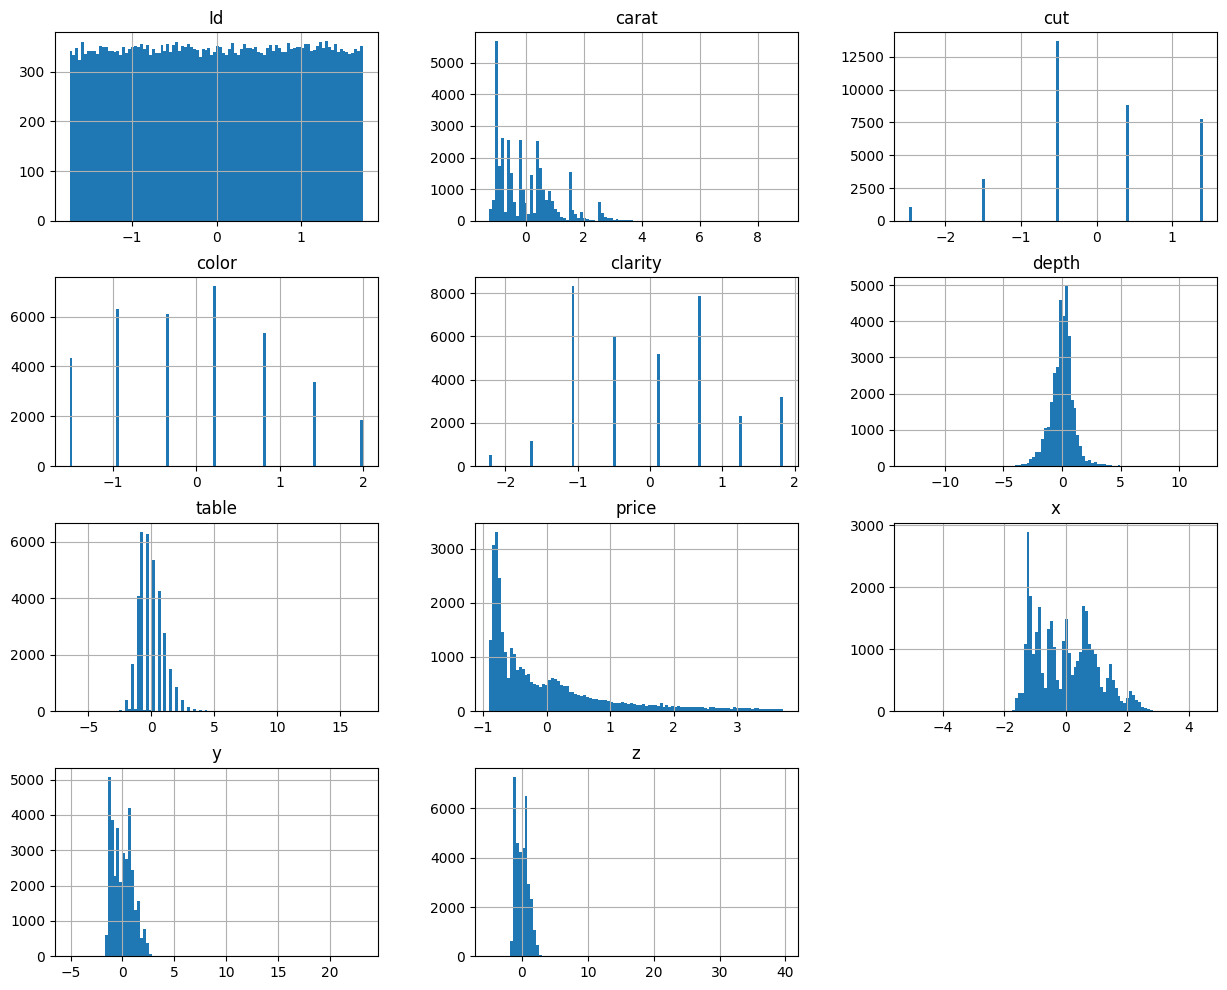

In [23]:
diamond_with_std=pd.DataFrame(columns=diamond_1.columns, data=diamond_num_std_scaled)

diamond_with_std.hist(bins=100, figsize=(15, 12))
plt.show()

In [68]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log2)
log_pop = log_transformer.transform(diamond[["price"]])

In [69]:
log_pop_df = pd.DataFrame(columns=["price"],data=log_pop)


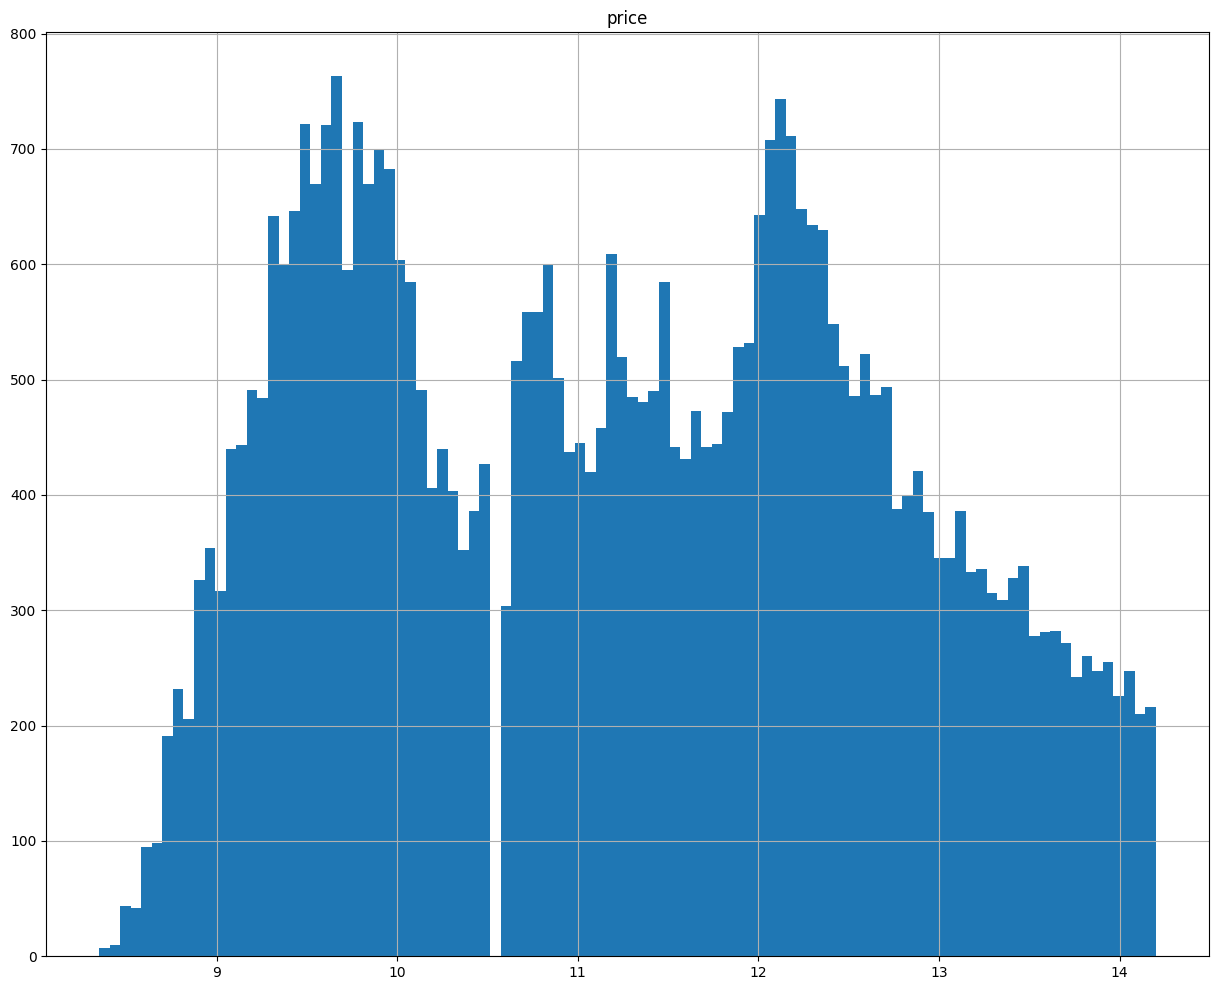

In [70]:

log_pop_df.hist(bins=100, figsize=(15, 12))
plt.show()

____

### Clean Staff

In [5]:
train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [6]:
from sklearn.model_selection import train_test_split
train_set_2, test_set_2 = train_test_split(train, test_size=0.2, random_state=40)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
num_pipeline = Pipeline([
('std_scaler', StandardScaler()),
])

In [8]:
np.array(diamond.columns)

array(['Id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'], dtype=object)

In [9]:
diamond_num = [item for item in np.array(diamond.columns) if item not in ["cut", "clarity", "color", "price", "Id"]]
diamond_price_train = train_set_2[["price"]]
diamond_price_train

,price
18091,9306
7298,2604
8450,12109
34990,11942
16697,4030
...,...
11532,2511
27640,4808
14501,725
30727,761


In [57]:
from sklearn.compose import ColumnTransformer
num_attribs = list(diamond_num)
cat_attribs = ["cut", "clarity", "color"]
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OrdinalEncoder(), cat_attribs),
])

In [11]:
def remove_strings(main_array, strings_to_remove):
    return np.array([item for item in main_array if item not in strings_to_remove])
train_set_2.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
18091,18092,1.50,Very Good,J,VVS2,62.2,57.0,9306,7.25,7.31,4.53
7298,7299,0.74,Ideal,G,VS2,61.3,55.0,2604,5.82,5.89,3.59
8450,8451,1.53,Ideal,F,SI1,61.6,56.0,12109,7.39,7.34,4.54
34990,34991,1.51,Ideal,D,SI1,61.9,57.0,11942,7.42,7.35,4.57
16697,16698,0.71,Ideal,E,VVS2,61.2,57.0,4030,5.73,5.80,3.53


In [59]:
diamond_prepared = full_pipeline.fit_transform(train_set_2.drop(["Id", "price"], axis=1))
diamond_prepared = pd.DataFrame(data=diamond_prepared, columns=remove_strings(train_set_2.columns, ["Id", "price"]))
diamond_prepared.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.488230,0.317760,-0.204541,1.358771,1.364213,1.431487,4.0,7.0,6.0
1,-0.118217,-0.312544,-1.104763,0.083266,0.137679,0.079250,2.0,5.0,3.0
2,1.551643,-0.102443,-0.654652,1.483645,1.390126,1.445872,2.0,2.0,2.0
3,1.509368,0.107659,-0.204541,1.510404,1.398764,1.489029,2.0,2.0,0.0
4,-0.181629,-0.382578,-0.204541,0.002989,0.059941,-0.007063,2.0,7.0,1.0


In [60]:
X=diamond_prepared
y=train_set_2["price"]
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
# desc_tree = LinearRegression()
# desc_tree = SVC(kernel='linear', random_state=40) 
desc_tree = RandomForestRegressor(random_state=42)
desc_tree.fit(X, y)

RandomForestRegressor(random_state=42)

In [14]:
test

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92
...,...,...,...,...,...,...,...,...,...,...
10783,10784,0.57,Ideal,H,VS1,60.9,56.0,5.34,5.36,3.26
10784,10785,1.05,Ideal,G,VS2,60.8,57.0,6.65,6.58,4.02
10785,10786,0.71,Ideal,E,VVS1,62.3,55.0,5.68,5.72,3.55
10786,10787,1.11,Premium,E,SI2,61.0,60.0,6.68,6.66,4.07


In [15]:
diamond_prepared_test = full_pipeline.fit_transform(test_set_2.drop(["Id", "price"], axis=1))
diamond_prepared_test = pd.DataFrame(data=diamond_prepared_test, columns=test.drop("Id", axis=1).columns)
# price = desc_tree.predict( diamond_prepared_test.drop(["price"], axis=1))
price = desc_tree.predict( diamond_prepared_test)
id=test_set_2["Id"]
diamond_prepared_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,2.596176,-0.034657,-0.207731,2.102999,2.173561,1.934754,2.0,2.0,6.0
1,-0.747795,0.033590,-0.207731,-0.723280,-0.766684,-0.676924,2.0,7.0,3.0
2,-0.537483,-0.580636,-0.207731,-0.411230,-0.389038,-0.426309,2.0,2.0,0.0
3,0.829550,-0.102905,-1.522389,1.006368,0.959698,0.879530,2.0,5.0,6.0
4,-0.537483,-0.853625,0.668707,-0.375567,-0.425004,-0.452689,3.0,2.0,6.0


In [67]:
len(price)

8631

In [79]:
data = {
    'Id': id,
    'price': price,
}
result = pd.DataFrame(data)
result

,Id,price
25284,25285,12279.100
2035,2036,1218.410
18066,18067,1706.050
38796,38797,5064.820
13421,13422,1042.810
...,...,...
23098,23099,7949.020
845,846,648.340
17825,17826,1783.810
42890,42891,4031.700


In [80]:
from sklearn.metrics import mean_squared_error
# housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(price, test_set_2["price"])
lin_rmse = np.sqrt(lin_mse)
lin_rmse

594.2934783467837

### Fine-Tuning

In [63]:

full_pipeline_2 = Pipeline([
("random_forest", RandomForestRegressor())
])

In [71]:
from sklearn.model_selection import GridSearchCV


param_grid = [
    {'random_forest__max_features': [10, 50, 100]}
]
grid_search = GridSearchCV(full_pipeline_2, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(diamond_prepared, train_set_2["price"])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('random_forest',
                                        RandomForestRegressor())]),
             param_grid=[{'random_forest__max_features': [10, 50, 100]}],
             scoring='neg_root_mean_squared_error')

In [81]:
grid_search.best_params_

{'random_forest__max_features': 10}

In [78]:
diamond_prepared_test = full_pipeline.fit_transform(test_set_2.drop(["Id", "price"], axis=1))
diamond_prepared_test = pd.DataFrame(data=diamond_prepared_test, columns=test.drop("Id", axis=1).columns)
# price = desc_tree.predict( diamond_prepared_test.drop(["price"], axis=1))
price = grid_search.predict( diamond_prepared_test)
id=test_set_2["Id"]
diamond_prepared_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,2.596176,-0.034657,-0.207731,2.102999,2.173561,1.934754,2.0,2.0,6.0
1,-0.747795,0.033590,-0.207731,-0.723280,-0.766684,-0.676924,2.0,7.0,3.0
2,-0.537483,-0.580636,-0.207731,-0.411230,-0.389038,-0.426309,2.0,2.0,0.0
3,0.829550,-0.102905,-1.522389,1.006368,0.959698,0.879530,2.0,5.0,6.0
4,-0.537483,-0.853625,0.668707,-0.375567,-0.425004,-0.452689,3.0,2.0,6.0


### Cross Validation 

In [83]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(grid_search, diamond_prepared_test, test_set_2["price"],
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [84]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [626.56469951 708.40379336 669.62865038 662.38964968 678.07244547
 489.36463533 578.96510041 578.52800167 597.79464461 627.77157339]
Mean: 621.7483193821078
Standard deviation: 60.4010904750602


In [85]:
result.to_csv("forth_version.csv", index=False)